In [13]:
import os
import json
import random
import pathlib
from diffusers.utils import load_image, make_image_grid
from PIL import Image
from torchvision import transforms

from src.conf import get_project_root

In [3]:
PROJECT_ROOT_PATH = get_project_root()
DATASET_PATH = PROJECT_ROOT_PATH / 'downloads' / 'VITON-HD'
PERSON_ROOT_PATH = DATASET_PATH / 'train' / 'image'
CLOTH_ROOT_PATH = DATASET_PATH / 'train' / 'cloth'

In [3]:
pathlib.Path(CLOTH_ROOT_PATH).exists()

True

In [4]:
def show_random_image(image_root_path: pathlib.PosixPath, resize: bool = False):
    filenames = os.listdir(image_root_path)
    filepaths = [image_root_path / fname for fname in filenames]
    rand_idx = random.randrange(len(filepaths))
    pil_image = Image.open(filepaths[rand_idx])
    if resize:
        pil_image.thumbnail((512, 512), Image.Resampling.LANCZOS)
    return pil_image

In [11]:
def show_random_image_pair():
    cloth_fnames = os.listdir(CLOTH_ROOT_PATH)
    person_fnames = os.listdir(PERSON_ROOT_PATH)
    cloth_fpaths = [CLOTH_ROOT_PATH / f'{fname}' for fname in cloth_fnames]
    person_fpaths = [PERSON_ROOT_PATH / f'{fname}' for fname in person_fnames]
    rand_idx = random.randrange(len(cloth_fnames))
    pil_person = Image.open(person_fpaths[rand_idx])
    pil_cloth = Image.open(cloth_fpaths[rand_idx])
    pil_person.thumbnail((512, 512), Image.Resampling.LANCZOS)
    pil_cloth.thumbnail((512, 512), Image.Resampling.LANCZOS)
    return make_image_grid([pil_person, pil_cloth], rows=1, cols=2)

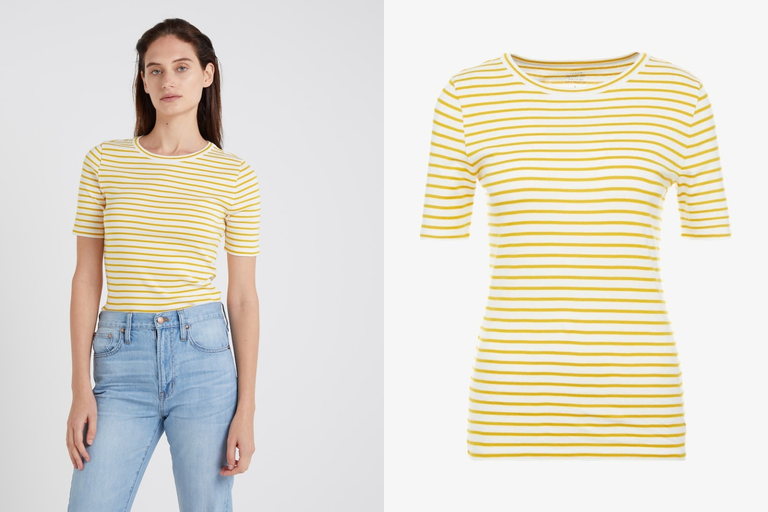

In [12]:
show_random_image_pair()

In [20]:
num_repeats = 5
for i in range(num_repeats):
    pil_image = show_random_image_pair()
    pil_image.save(PROJECT_ROOT_PATH / 'tmp' / 'vitonhd_test' / f'{i}.jpg', subsampling=0, quality=100)

In [44]:
def build_json_dataset(save_file='viton_hd.json'):
    save_path = PROJECT_ROOT_PATH / 'downloads' / 'ip-adapter' / 'data' / f'{save_file}'
    # if not pathlib.Path(save_path).is_file():
    #     open(save_path, 'w').close()
    with open(save_path, 'w') as jsonfile:
        cloth_fnames = os.listdir(CLOTH_ROOT_PATH)
        person_fnames = os.listdir(PERSON_ROOT_PATH)
        num_images = len(cloth_fnames)
        data = []
        for idx in range(num_images):
            data.append({
                'cloth_file': cloth_fnames[idx],
                'person_file': person_fnames[idx],
                'text': ''
            })
        json.dump(data, jsonfile, indent=4)

In [46]:
build_json_dataset()

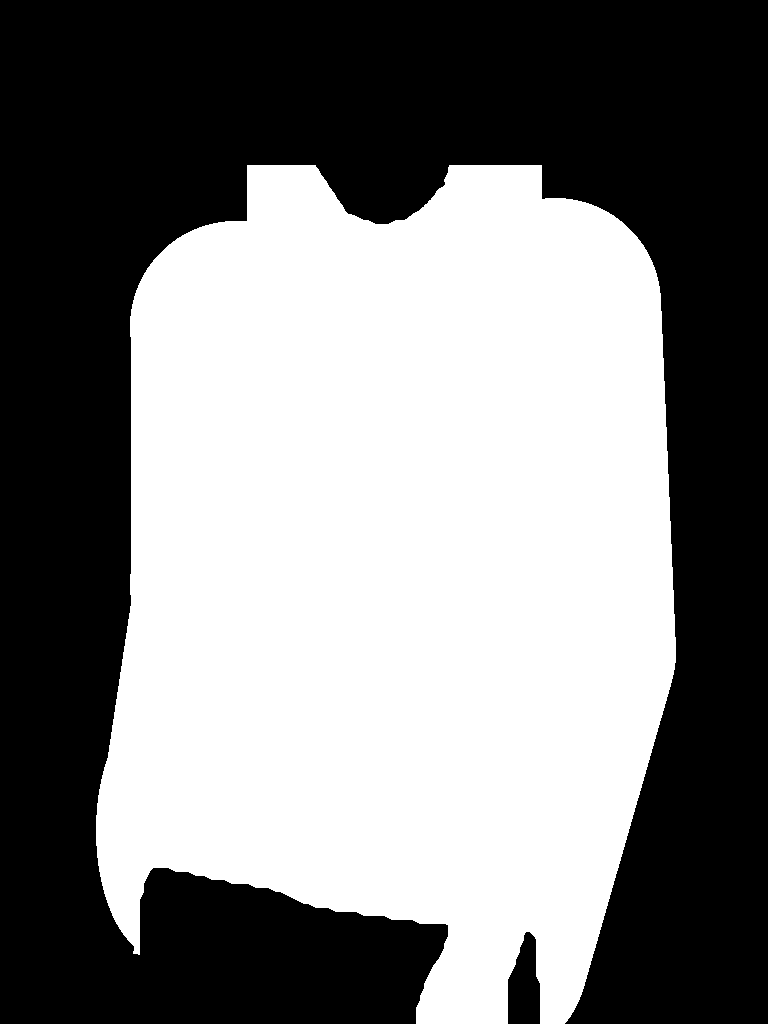

tensor([0., 1.])

In [15]:
mask = load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/mask/00000_00.png')
display(mask)
transforms.ToTensor()(mask).unique()

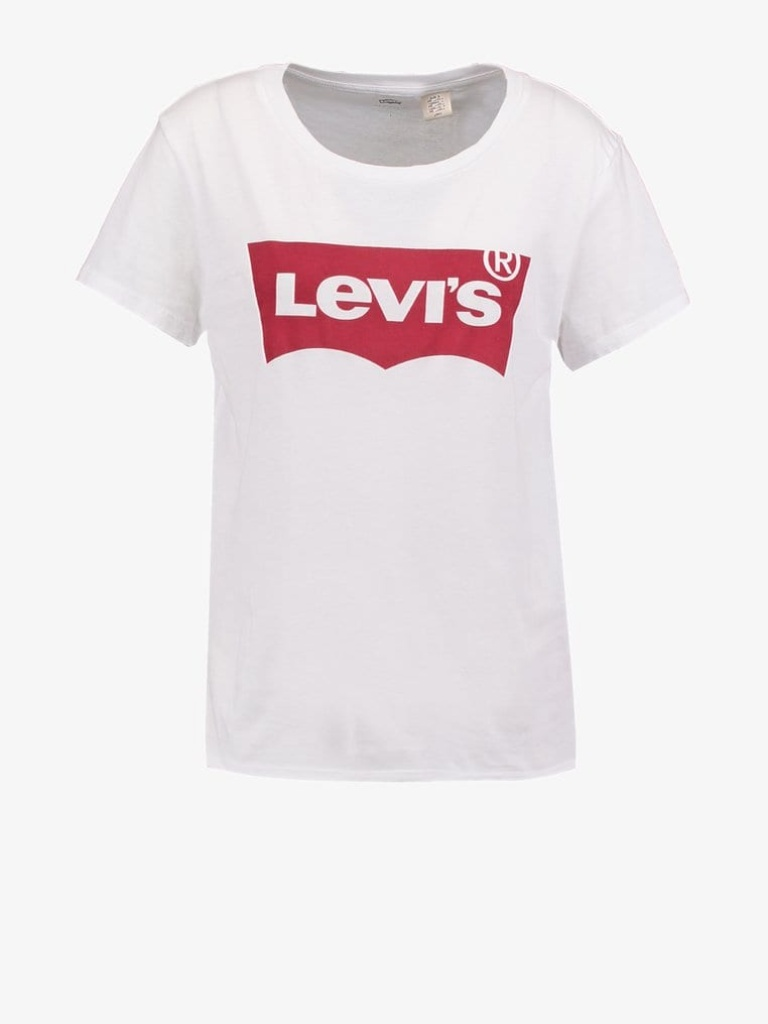

In [8]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/cloth/00000_00.jpg')

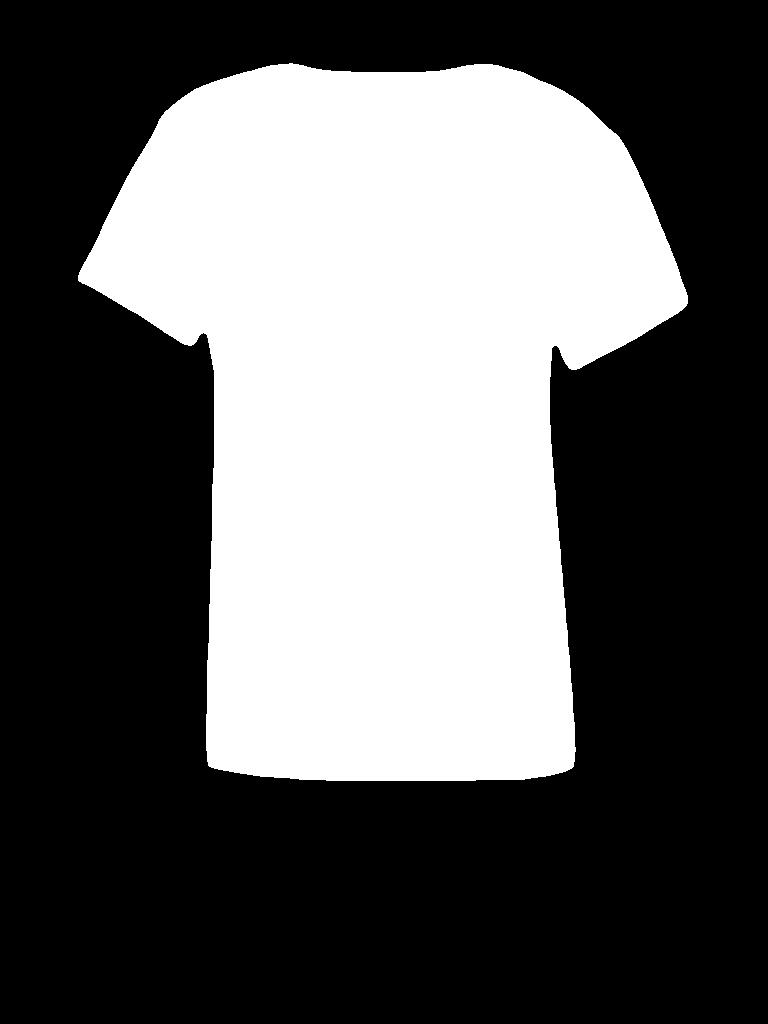

In [9]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/cloth-mask/00000_00.jpg')

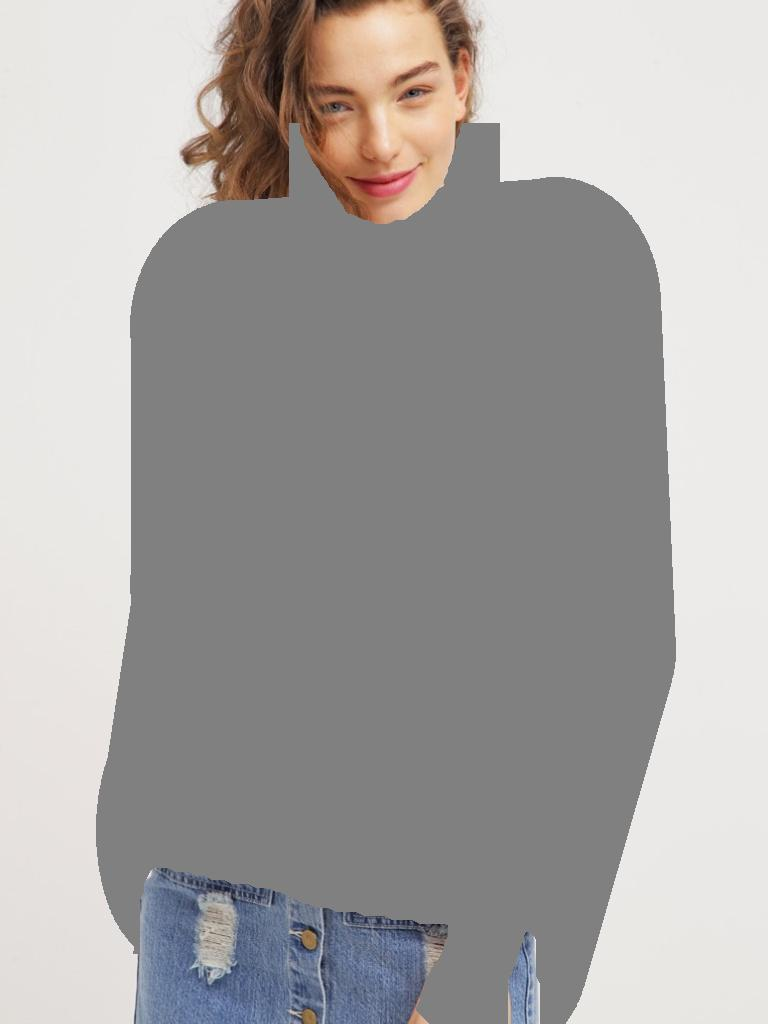

In [9]:
# agnostic map
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/agnostic-v3.2/00000_00.jpg')

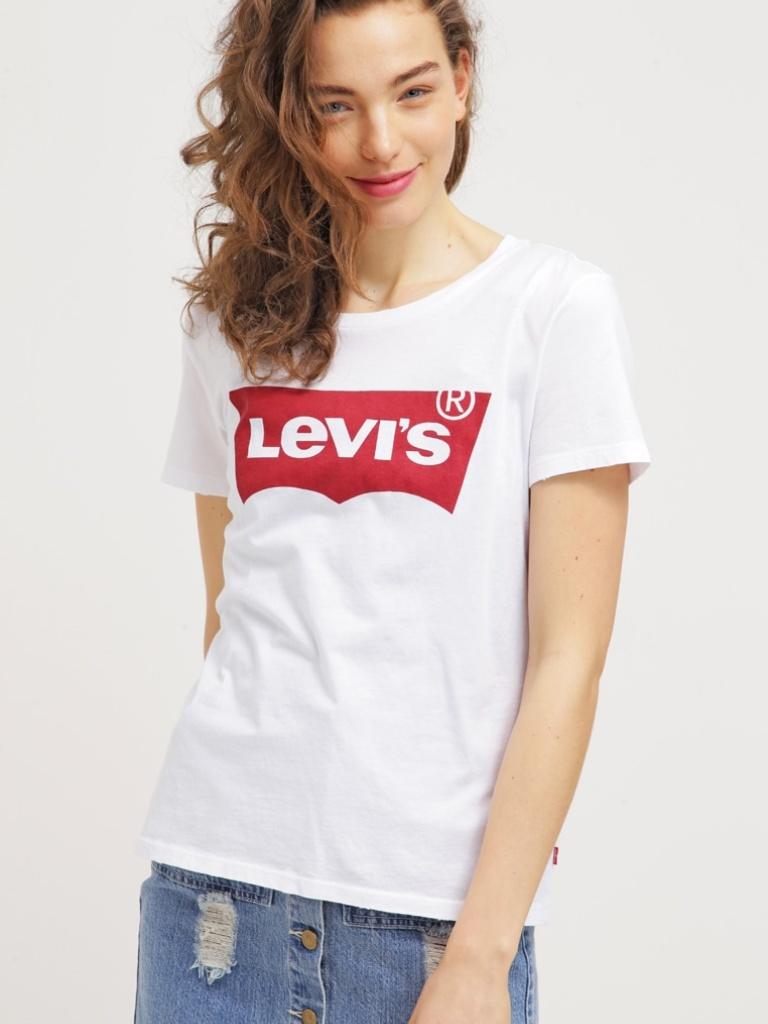

In [13]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/image/00000_00.jpg')

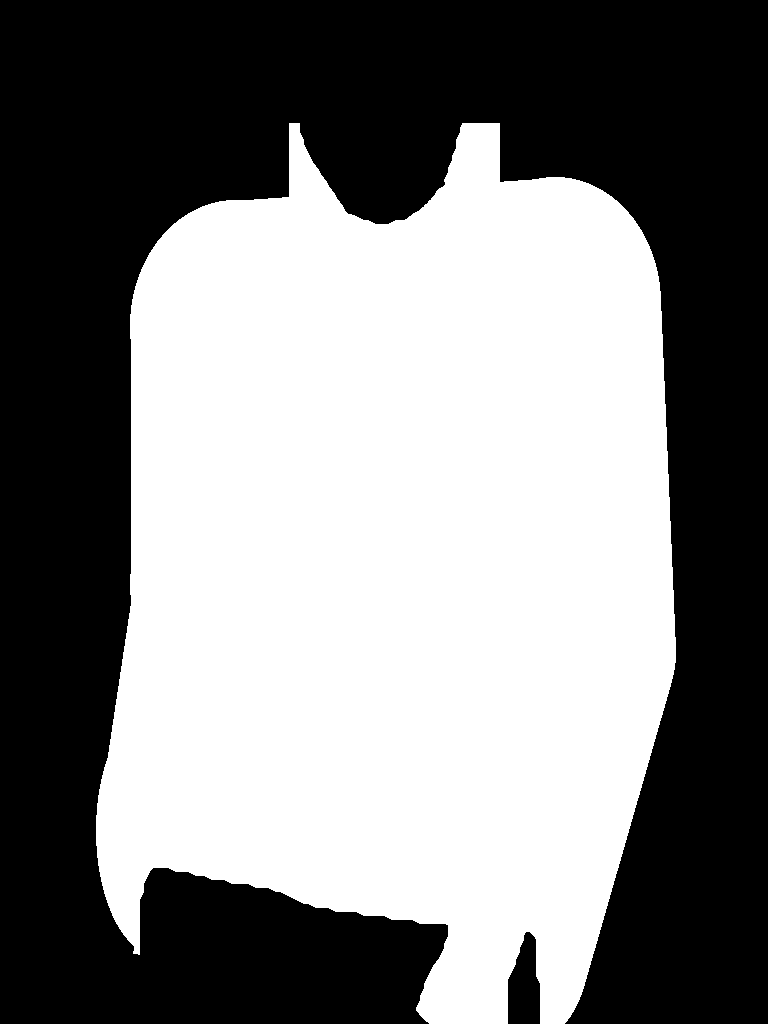

In [15]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/agnostic-mask/00000_00_mask.png')

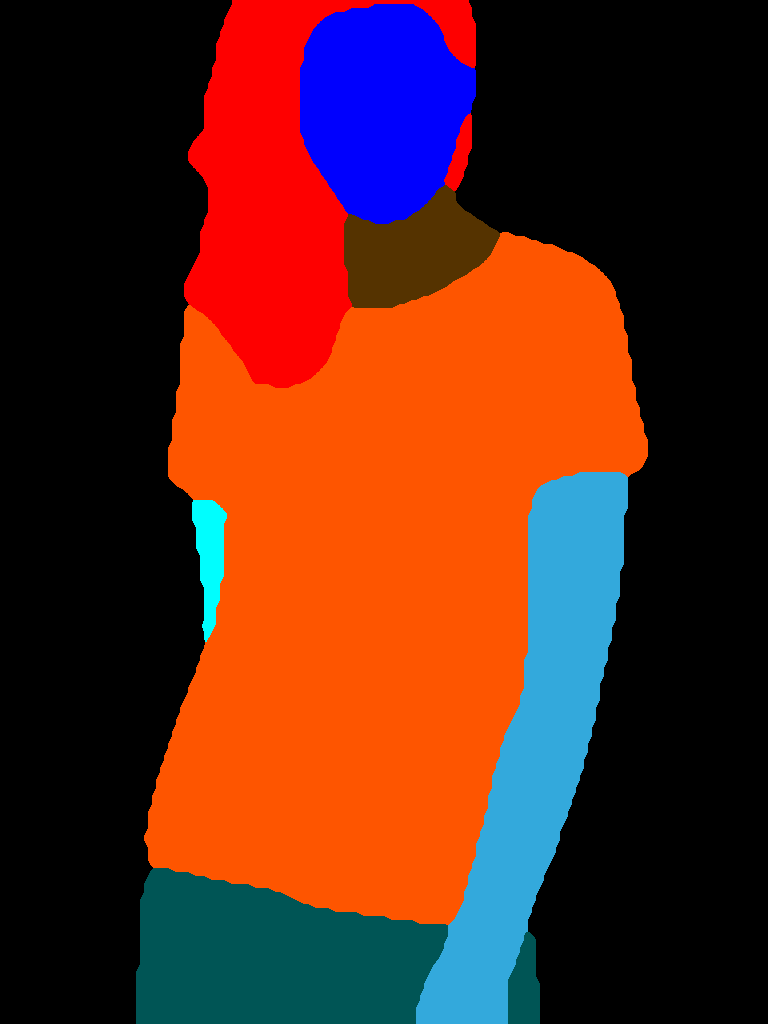

In [17]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/image-parse-v3/00000_00.png')

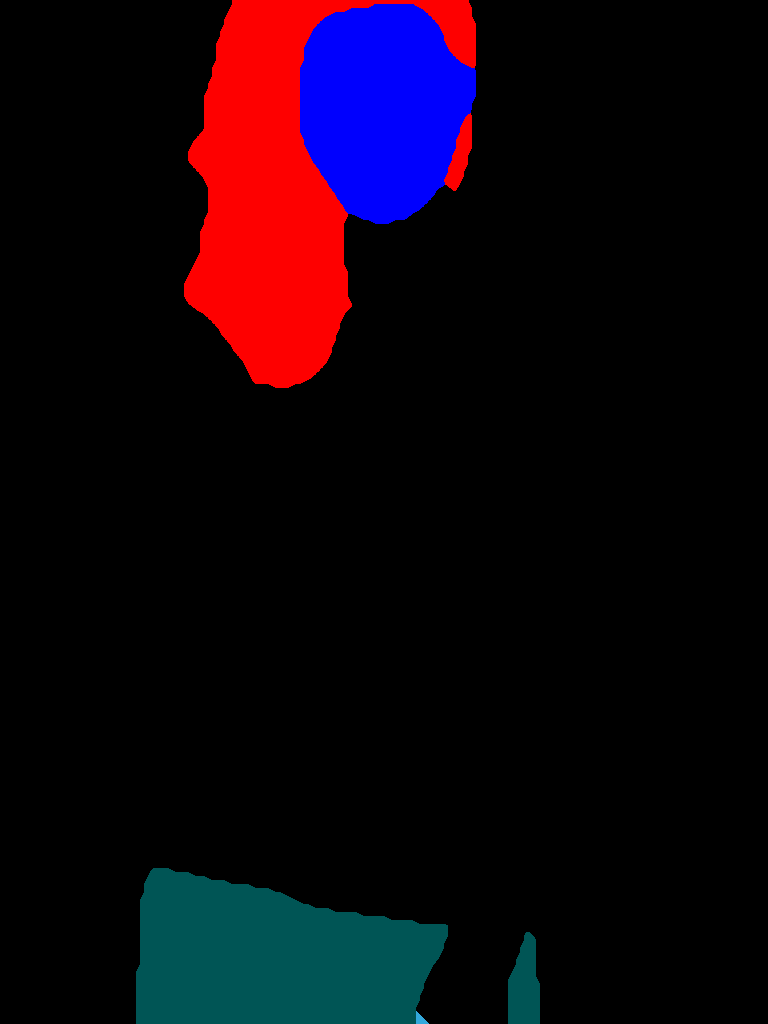

In [18]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/image-parse-agnostic-v3.2/00000_00.png')

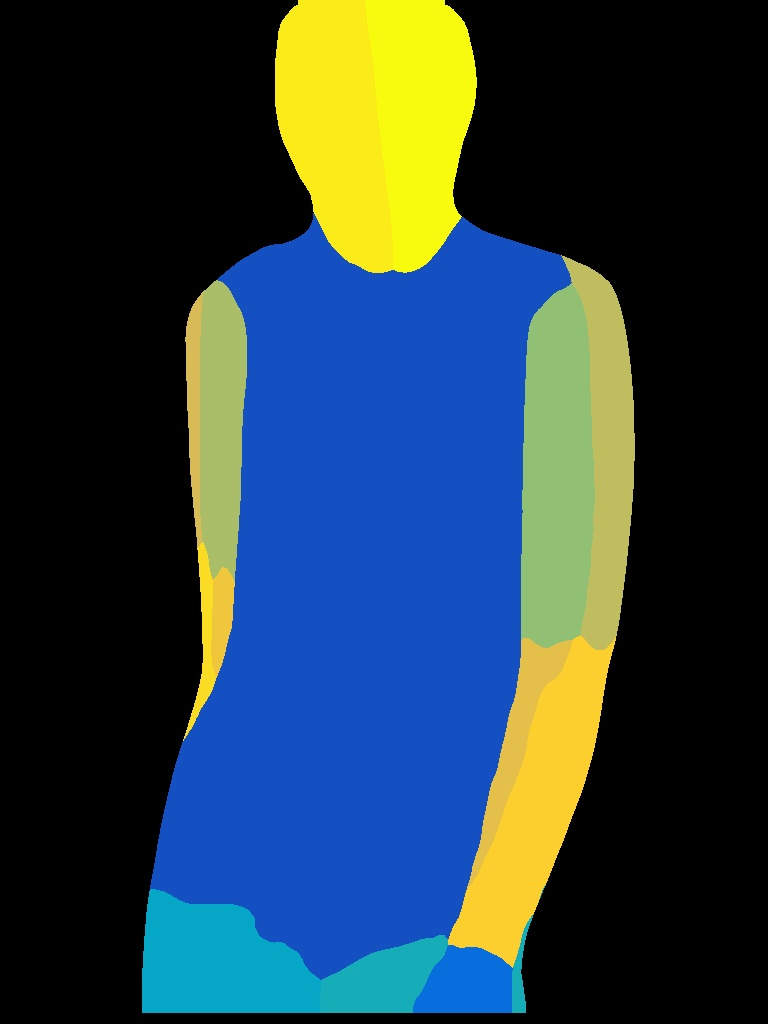

In [22]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/image-densepose/00000_00.jpg')

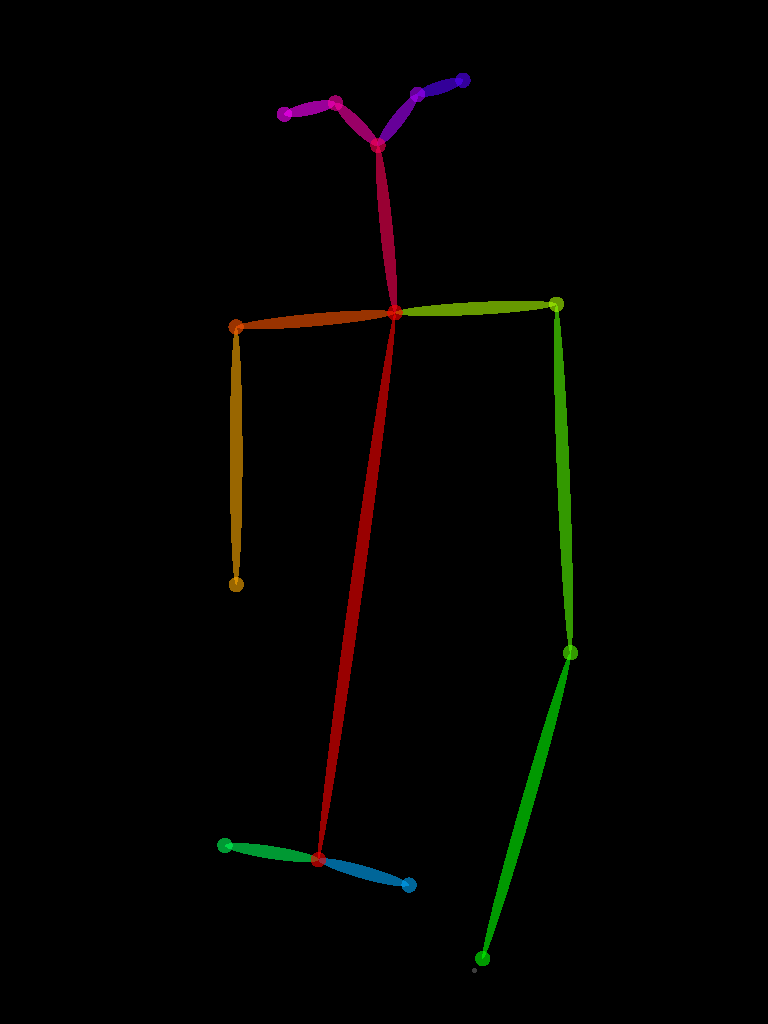

In [21]:
load_image('/workspace/playground/opensources/CAT-DM/datasets/vitonhd/train/openpose_img/00000_00_rendered.png')